In [0]:
!pip install empath

In [111]:
import pandas as pd
from empath import Empath

In [112]:
lexicon = Empath()

In [113]:
df = pd.read_csv('../Processed_Dataset/cleaned_dataset.csv')

In [114]:
lexicon.create_category("persuasion",["anger","anticipation","disgust","fear","joy","negative","positive","sadness","surprise","trust"])

["fear", "sadness", "anger", "disappointment", "guilt", "desperation", "regret", "uncertainty", "emotion", "rage", "hatred", "sorrow", "happiness", "jealousy", "resentment", "worry", "mixed_emotions", "terror", "anguish", "panic", "despair", "sympathy", "anxiousness", "anxiety", "fury", "jealously", "pity", "apprehension", "longing", "determination", "dissapointment", "insecurity", "emotions", "trepidation", "hurt", "elation", "curiousity", "eagerness", "betrayal", "grief", "excitement", "remorse", "dread", "hostility", "malice", "pride", "pain", "contempt", "nervousness", "shock", "concern", "confusion", "curiosity", "irritation", "joy", "helplessness", "fear", "bitterness", "revulsion", "uneasiness", "hatred", "humiliation", "pure_fear", "Fear", "many_emotions", "vulnerability", "hopelessness", "satisfaction", "so_much_anger", "seriousness", "loathing", "denial", "lust", "unease", "unhappiness", "impatience", "certainty", "aggression", "so_many_emotions", "recognition", "hysteria", "

In [115]:
ratings_list = df["ratings"].tolist()

In [116]:
#Identify all the possible rating types that mentions persuasiveness
import ast 

persuasive_ratings_counts = []
for i,rating in enumerate(ratings_list):
    rating = ast.literal_eval(rating)
    for categories in rating:
        if categories['name'] == 'Persuasive':
            persuasive_ratings_counts.append({'per_count':categories['count']})
            break
    if len(persuasive_ratings_counts)!=i+1:
        persuasive_ratings_counts.append({'per_count':0})    

In [117]:
df["per_count"] = pd.DataFrame(persuasive_ratings_counts)

In [118]:
df["per_count"] = df["per_count"].replace(0,1)

In [119]:
df["count_per_view"] = df["per_count"]/df["views"]

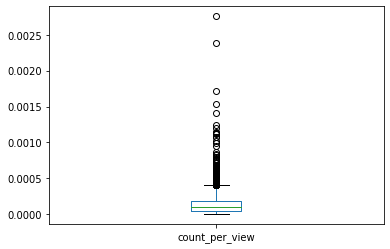

In [120]:
df["count_per_view"].plot(kind='box')

In [121]:
df["normalised_count_per_view"] = (df["count_per_view"]-df["count_per_view"].min())/(df["count_per_view"].max()-df["count_per_view"].min())

In [122]:
t_df = pd.DataFrame()
t_df["transcript"] = df["transcript"]

In [123]:
transcripts = df["transcript"]
scores_list = []

for i,script in enumerate(transcripts):
  lexi_dict = lexicon.analyze(script,categories=["persuasion"],normalize=True)
  scores_list.append(lexi_dict)


In [124]:
t_df["persuasion_score"] = pd.DataFrame(scores_list)

In [125]:
t_df["persuasion_score"].max()

0.018497109826589597

In [126]:
lexicon.create_category("ny_per",["anger","anticipation","disgust","fear","joy","negative","positive","sadness","surprise","trust"], model="nytimes")

["anger", "apprehension", "anxiety", "elation", "regret", "disgust", "disappointment", "unhappiness", "impatience", "irritation", "fear", "frustration", "dread", "nervousness", "bewilderment", "indignation", "revulsion", "bitterness", "anguish", "wariness", "feeling", "pessimism", "puzzlement", "incredulity", "unease", "emotion", "feelings", "insecurity", "weariness", "satisfaction", "exasperation", "euphoria", "resentment", "discomfort", "trepidation", "bafflement", "uneasiness", "shock", "helplessness", "disbelief", "annoyance", "grief", "despair", "joy", "hysteria", "cynicism", "exhilaration", "outrage", "desperation", "fury", "remorse", "optimism", "discouragement", "apathy", "sadness", "panic", "ambivalence", "ill_will", "perplexity", "rancor", "jubilation", "astonishment", "distress", "worry", "sentiment", "sympathy", "disapproval", "hurt", "dissatisfaction", "dismay", "distrust", "rage", "glee", "agitation", "fatalism", "sense", "enthusiasm", "inevitability", "hesitancy", "hosti

In [127]:
ny_score_list = []

for i,script in enumerate(transcripts):
  lexi_dict = lexicon.analyze(script,categories=["ny_per"],normalize=True)
  ny_score_list.append(lexi_dict)

In [128]:
t_df["ny_persuasion_score"] = pd.DataFrame(ny_score_list)

In [129]:
t_df["ny_persuasion_score"].max()

0.015097338100913786

In [130]:
#t_df["ratings"] = df["ratings"]

In [131]:
t_df[t_df["persuasion_score"].max()==t_df["persuasion_score"]]

,transcript,persuasion_score,ny_persuasion_score
821,So what does the happiest man in the world loo...,0.018497,0.003468


In [132]:
t_df[t_df["ny_persuasion_score"].max()==t_df["ny_persuasion_score"]]

,transcript,persuasion_score,ny_persuasion_score
1219,"In the 17th century, a woman named Giulia Tofa...",0.005165,0.015097


In [133]:
lexicon.create_category("reddit_per",["anger","anticipation","disgust","fear","joy","negative","positive","sadness","surprise","trust"], model="reddit")

["anger", "sadness", "fear", "uneasiness", "strong_emotion", "feeling", "regret", "disgust", "indifference", "sorrow", "jealousy", "negative_emotion", "negative_feeling", "joy", "emotion", "helplessness", "indignation", "negative_emotions", "frustration", "elation", "pity", "intense_feelings", "revulsion", "unease", "anguish", "other_emotion", "only_emotion", "dissatisfaction", "feelings", "disappointment", "catharsis", "strong_emotions", "excitement", "other_emotions", "overwhelming_sense", "positive_emotions", "apprehension", "ambivalence", "emotions", "negative_feelings", "fears", "happiness", "hopelessness", "satisfaction", "longing", "good_feelings", "grief", "overwhelming_feeling", "powerlessness", "hopefulness", "embarassment", "negativity", "saddness", "desperation", "own_fear", "giddiness", "trepidation", "disapproval", "deep_sense", "emotional_response", "sympathy", "bad_feelings", "desire", "other_feelings", "such_feelings", "deep_sadness", "resentment", "vague_sense", "drea

In [134]:
reddit_score_list = []

for i,script in enumerate(transcripts):
  lexi_dict = lexicon.analyze(script,categories=["reddit_per"],normalize=True)
  reddit_score_list.append(lexi_dict)

In [135]:
t_df["reddit_persuasion_score"] = pd.DataFrame(reddit_score_list)

In [136]:
t_df[t_df["reddit_persuasion_score"].max()==t_df["reddit_persuasion_score"]]

,transcript,persuasion_score,ny_persuasion_score,reddit_persuasion_score
1262,"One day in 1819, 3,000 miles off the coast of ...",0.006058,0.006058,0.020192


In [137]:
per_word_list = ["fear", "sadness", "anger", "disappointment", "guilt", "desperation", "regret", "uncertainty", "emotion", "rage", "hatred", "sorrow", "happiness", "jealousy", "resentment", "worry", "mixed_emotions", "terror", "anguish", "panic", "despair", "sympathy", "anxiousness", "anxiety", "fury", "jealously", "pity", "apprehension", "longing", "determination", "dissapointment", "insecurity", "emotions", "trepidation", "hurt", "elation", "curiousity", "eagerness", "betrayal", "grief", "excitement", "remorse", "dread", "hostility", "malice", "pride", "pain", "contempt", "nervousness", "shock", "concern", "confusion", "curiosity", "irritation", "joy", "helplessness", "fear", "bitterness", "revulsion", "uneasiness", "hatred", "humiliation", "pure_fear", "Fear", "many_emotions", "vulnerability", "hopelessness", "satisfaction", "so_much_anger", "seriousness", "loathing", "denial", "lust", "unease", "unhappiness", "impatience", "certainty", "aggression", "so_many_emotions", "recognition", "hysteria", "calmness", "sincerity", "saddness", "agitation", "wariness", "feeling", "conflicting_emotions", "Shock", "envy", "annoyance", "Anger", "compassion", "pure_terror", "fright", "Worry", "deep_sadness", "madness", "admiration", "raw_emotion"]
per_word_list += ["anger", "apprehension", "anxiety", "elation", "regret", "disgust", "disappointment", "unhappiness", "impatience", "irritation", "fear", "frustration", "dread", "nervousness", "bewilderment", "indignation", "revulsion", "bitterness", "anguish", "wariness", "feeling", "pessimism", "puzzlement", "incredulity", "unease", "emotion", "feelings", "insecurity", "weariness", "satisfaction", "exasperation", "euphoria", "resentment", "discomfort", "trepidation", "bafflement", "uneasiness", "shock", "helplessness", "disbelief", "annoyance", "grief", "despair", "joy", "hysteria", "cynicism", "exhilaration", "outrage", "desperation", "fury", "remorse", "optimism", "discouragement", "apathy", "sadness", "panic", "ambivalence", "ill_will", "perplexity", "rancor", "jubilation", "astonishment", "distress", "worry", "sentiment", "sympathy", "disapproval", "hurt", "dissatisfaction", "dismay", "distrust", "rage", "glee", "agitation", "fatalism", "sense", "enthusiasm", "inevitability", "hesitancy", "hostility", "equanimity", "deep_sense", "indifference", "emotions", "anxieties", "skepticism", "negativity", "hopelessness", "empathy", "amazement", "strong_emotions", "disillusionment", "growing_sense", "disquiet", "frustrations", "bravado", "admiration", "powerlessness", "awkwardness", "affection"]
per_word_list += ["anger", "sadness", "fear", "uneasiness", "strong_emotion", "feeling", "regret", "disgust", "indifference", "sorrow", "jealousy", "negative_emotion", "negative_feeling", "joy", "emotion", "helplessness", "indignation", "negative_emotions", "frustration", "elation", "pity", "intense_feelings", "revulsion", "unease", "anguish", "other_emotion", "only_emotion", "dissatisfaction", "feelings", "disappointment", "catharsis", "strong_emotions", "excitement", "other_emotions", "overwhelming_sense", "positive_emotions", "apprehension", "ambivalence", "emotions", "negative_feelings", "fears", "happiness", "hopelessness", "satisfaction", "longing", "good_feelings", "grief", "overwhelming_feeling", "powerlessness", "hopefulness", "embarassment", "negativity", "saddness", "desperation", "own_fear", "giddiness", "trepidation", "disapproval", "deep_sense", "emotional_response", "sympathy", "bad_feelings", "desire", "other_feelings", "such_feelings", "deep_sadness", "resentment", "vague_sense", "dread", "true_feeling", "dissapointment", "inadequacy", "realisation", "deep_feeling", "righteous_anger", "anxiousness", "revel", "discontent", "anger/frustration", "natural_response", "loneliness", "dejection", "more_sadness", "just_anger", "insecurity", "such_anger", "deep_fear", "worry", "self_hatred", "self_loathing", "intense_feeling", "worthlessness", "sympathy", "powerful_emotions", "positive_feelings", "jubilation", "hurt", "self_doubt"]

per_word_list = list(set(per_word_list))

In [138]:
cleaned_word_list = []
cleaned_multiple_word_list = []

for word in per_word_list:
  if "_" in word:
    new_word = word.replace("_"," ")
    cleaned_multiple_word_list.append(new_word)
  else:
    new_word = word
    cleaned_word_list.append(new_word)


In [139]:
tokenised_transcript_list = [transcript.split(" ") for transcript in transcripts]

In [140]:
tokenised_terms_list = []

for d in tokenised_transcript_list:
  tokenised_terms_list.append(list(set(d)))

In [141]:
final_df = pd.DataFrame()
final_df["transcript"] = df["transcript"]

In [142]:
#One-hot encoding for single words

for word in cleaned_word_list:
  column_list = []
  for transcript in tokenised_terms_list:
    column_dict = {}
    column_dict[word] = 0
    if word in transcript:
      column_dict[word] += 1
    column_list.append(column_dict)
  
  final_df[word] = pd.DataFrame(column_list)


In [143]:
#One hot encoding for multiple words

for words in cleaned_multiple_word_list:
  column_list = []
  for transcript in transcripts:
    column_dict = {}
    column_dict[words] = 0
    if words in transcript:
      column_dict[words] += 1
    column_list.append(column_dict)

  final_df[words] = pd.DataFrame(column_list)

In [144]:
def noramlise_per_score(scores,str_val):
  new_scores = []
  max_score = max(scores)
  min_score = min(scores)
  for score in scores:
    norm_score = (score-min_score)/(max_score-min_score)
    new_scores.append({str_val:norm_score})

  return new_scores


In [145]:
norm_per_score = noramlise_per_score(t_df["persuasion_score"],"norm_persuasion_score")
ny_norm_per_score = noramlise_per_score(t_df["ny_persuasion_score"],"norm_ny_persuasion_score")
reddit_norm_per_score = noramlise_per_score(t_df["reddit_persuasion_score"],"norm_reddit_persuasion_score")

In [146]:
t_df["norm_persuasion_score"] = pd.DataFrame(norm_per_score)
t_df["norm_ny_persuasion_score"] = pd.DataFrame(ny_norm_per_score)
t_df["reddit_ny_persuasion_score"] = pd.DataFrame(reddit_norm_per_score)

In [147]:
t_df["final_per_score"] = (t_df["norm_persuasion_score"] + t_df["norm_ny_persuasion_score"] + t_df["reddit_ny_persuasion_score"]) / 3

In [148]:
final_df["final_per_score"] = t_df["final_per_score"]

In [149]:
feature_col_names = final_df.columns[1:-1]
features_df = final_df[feature_col_names]

In [150]:
final_df["final_per_score"].median()

0.022300745096853127

In [151]:
# Can change score to 0
final_df["binary_score"] = final_df["final_per_score"].apply(lambda score: 1 if score > final_df["final_per_score"].median() else 0)
#final_df["binary_score"] = final_df["final_per_score"].apply(lambda score: 1 if score > 0 else 0)

In [152]:
target_df = pd.DataFrame()
target_df["binary_score"] = final_df["binary_score"]

In [153]:
final_target_df = pd.DataFrame()

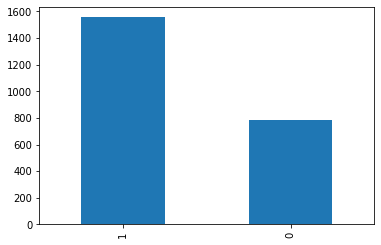

In [154]:
prop_vote_persuasive = 0.02
df["normalised_count_per_view"].apply(lambda x: 1 if x > prop_vote_persuasive else 0).value_counts().plot(kind='bar')

In [155]:
(df["normalised_count_per_view"] < 0.01).sum()

439

In [156]:
final_target_df["normalised_count_per_view"] = df["normalised_count_per_view"].apply(lambda score: 1 if score > prop_vote_persuasive else 0)
#final_target_df["normalised_count_per_view"] = df["normalised_count_per_view"].apply(lambda score: 1 if score > df["normalised_count_per_view"].quantile(.2) else 0)
#final_target_df["normalised_count_per_view"] = df["normalised_count_per_view"].apply(lambda score: 1 if score > 0 else 0)

In [157]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [158]:
unigram_df = pd.read_csv('../Processed_Dataset/features_unigram.csv')
bigram_df = pd.read_csv('../Processed_Dataset/features_bigram.csv')
trigram_df = pd.read_csv('../Processed_Dataset/features_trigram.csv')

In [159]:
unigram_list = unigram_df.columns[1:-1].tolist()

In [160]:
for word in cleaned_word_list:
  if word in unigram_list:
      unigram_list.remove(word)

In [161]:
bigram_list = bigram_df.columns[1:].tolist()

In [162]:
trigram_list = trigram_df.columns[1:].tolist()

In [163]:
extra_feature_list = unigram_list + bigram_list + trigram_list

In [164]:
for words in cleaned_multiple_word_list:
  if words in extra_feature_list:
    extra_feature_list.remove(words)

In [165]:
extra_feature_list += cleaned_word_list + cleaned_multiple_word_list

In [166]:
from sklearn.feature_extraction.text import CountVectorizer

In [167]:
import pickle
import nltk

vec = CountVectorizer(tokenizer=nltk.word_tokenize, ngram_range=(1, 3), 
                      vocabulary=extra_feature_list)

pickle.dump(vec, open('count_vectorizer.sav', 'wb'))

vec.fit(transcripts)

features_df = pd.DataFrame(vec.transform(transcripts).toarray(), columns=vec.get_feature_names())

/Users/Junxiang/Documents/Y4S2/IS450 - Text Mining and Language Processing/is450-venv/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [168]:
features_df

,laughter,im,people,dont,see,like,oh,money,think,children,...,mixed emotions,overwhelming feeling,true feeling,own fear,deep sadness,deep feeling,natural response,only emotion,so much anger,so many emotions
0,39,0,16,0,5,9,1,1,26,7,...,0,0,0,0,0,0,0,0,0,0
1,22,0,9,0,1,6,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
2,38,0,8,0,4,22,2,1,6,1,...,0,0,0,0,0,0,0,0,0,0
3,10,0,12,0,1,16,1,3,3,1,...,0,0,0,0,0,0,0,0,0,0
4,10,0,9,0,12,24,0,6,5,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,1,0,5,0,3,3,0,0,3,2,...,0,0,0,0,0,0,0,0,0,0
2336,2,0,1,0,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2337,1,0,0,0,6,7,0,0,10,0,...,0,0,0,0,0,0,0,0,0,0
2338,20,0,19,0,10,15,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
X_train, X_test, y_train, y_test = train_test_split(features_df, final_target_df, test_size=0.2)

classifier = MultinomialNB()
classifier.fit(X_train,y_train)

/Users/Junxiang/Documents/Y4S2/IS450 - Text Mining and Language Processing/is450-venv/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [180]:
pickle.dump(classifier, open('persuasion_model.sav', 'wb'))

In [181]:
y_pred_proba = classifier.predict_proba(X_test)
y_pred_proba = y_pred_proba[:, 1]
y_pred = classifier.predict(X_test)
y_pred.shape

(468,)

(array([177.,  10.,  10.,   6.,   4.,   2.,   4.,   6.,   7., 242.]),
 array([2.08411764e-43, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

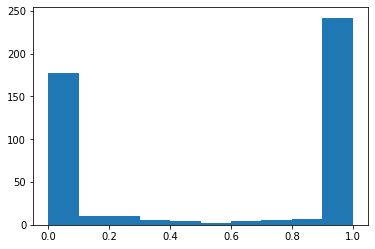

In [182]:
import matplotlib.pyplot as plt
plt.hist(y_pred_proba)

In [173]:
from sklearn import metrics
metrics.roc_auc_score(y_test, y_pred_proba)

0.8322621970748372

In [174]:
metrics.f1_score(y_test,y_pred)

0.8387096774193549

In [177]:
df["persuasion_score"] = (df["count_per_view"]-df["count_per_view"].min())/(df["count_per_view"].max()-df["count_per_view"].min())

In [185]:
df["persuasion_score"].median()

0.03341206172518183

In [178]:
df[df.index.isin(X_train.index)]

,id,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,...,speaker_occupation,tags,title,url,views,transcript,per_count,count_per_view,normalised_count_per_view,persuasion_score
1,1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,...,Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,"Thank you so much, Chris. And it's truly a gre...",268,0.000084,0.030176,0.030176
4,4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,...,Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,"About 10 years ago, I took on the task to teac...",2542,0.000212,0.076582,0.076582
5,5,672,"Tony Robbins discusses the ""invisible forces"" ...",1305,TED2006,1138838400,36,Tony Robbins,Tony Robbins: Why we do what we do,1,...,Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,https://www.ted.com/talks/tony_robbins_asks_wh...,20685401,Thank you. I have to tell you I'm both challen...,2423,0.000117,0.042286,0.042286
6,6,919,When two young Mormon missionaries knock on Ju...,992,TED2006,1140739200,31,Julia Sweeney,Julia Sweeney: Letting go of God,1,...,"Actor, comedian, playwright","['Christianity', 'God', 'atheism', 'comedy', '...",Letting go of God,https://www.ted.com/talks/julia_sweeney_on_let...,3769987,"On September 10, the morning of my seventh bir...",311,0.000082,0.029726,0.029726
7,7,46,Architect Joshua Prince-Ramus takes the audien...,1198,TED2006,1140652800,19,Joshua Prince-Ramus,Joshua Prince-Ramus: Behind the design of Seat...,1,...,Architect,"['architecture', 'collaboration', 'culture', '...",Behind the design of Seattle's library,https://www.ted.com/talks/joshua_prince_ramus_...,967741,I'm going to present three projects in rapid f...,37,0.000038,0.013679,0.013679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,2406,10,"How can Africa, the home to some of the larges...",810,TEDGlobal 2017,1503792000,1,Olúfẹ́mi Táíwò,Olúfẹ́mi Táíwò: Why Africa must become a ...,1,...,"Historian, philosopher","['Africa', 'agriculture', 'history', 'leadersh...",Why Africa must become a center of knowledge a...,https://www.ted.com/talks/oluf_mi_taiwo_why_af...,418368,What stands between Africa's current prostrate...,30,0.000072,0.025815,0.025815
2336,2408,6,How can you study Mars without a spaceship? He...,290,TED2017,1492992000,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,...,Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470,This is a picture of a sunset on Mars taken by...,7,0.000017,0.005896,0.005896
2337,2409,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,...,Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647,"In my early days as a graduate student, I went...",3,0.000008,0.002712,0.002712
2338,2410,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,...,Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.ted.com/talks/theo_e_j_wilson_a_bl...,419309,I took a cell phone and accidentally made myse...,65,0.000155,0.056020,0.056020


In [95]:
export_df = df[df.index.isin(X_train.index)].copy()

In [96]:
export_df.drop(columns=['per_count', 'count_per_view', 'normalised_count_per_view'])

,id,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,transcript,persuasion_score
0,0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,Good morning. How are you?(Laughter)It's been ...,0.081992
1,1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,"Thank you so much, Chris. And it's truly a gre...",0.030176
3,3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,If you're here today — and I'm very happy that...,0.098064
4,4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,"About 10 years ago, I took on the task to teac...",0.076582
6,6,919,When two young Mormon missionaries knock on Ju...,992,TED2006,1140739200,31,Julia Sweeney,Julia Sweeney: Letting go of God,1,1152490260,"[{'id': 3, 'name': 'Courageous', 'count': 477}...","[{'id': 22, 'hero': 'https://pe.tedcdn.com/ima...","Actor, comedian, playwright","['Christianity', 'God', 'atheism', 'comedy', '...",Letting go of God,https://www.ted.com/talks/julia_sweeney_on_let...,3769987,"On September 10, the morning of my seventh bir...",0.029726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,2407,17,"Between 2008 and 2016, the United States depor...",476,TED2017,1496707200,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,1505851216,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430,"So, Ma was trying to explain something to me a...",0.019135
2336,2408,6,How can you study Mars without a spaceship? He...,290,TED2017,1492992000,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,1505919737,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470,This is a picture of a sunset on Mars taken by...,0.005896
2337,2409,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What in

In [97]:
export_df.to_csv('cleaned_dataset_with_persuasion_score.csv', index=False)

In [103]:
df[df.index.isin(X_test.index)]

,id,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,...,speaker_occupation,tags,title,url,views,transcript,per_count,count_per_view,normalised_count_per_view,persuasion_score
2,2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,...,Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,"(Music: ""The Sound of Silence,"" Simon & Garfun...",230,0.000141,0.050779,0.050779
5,5,672,"Tony Robbins discusses the ""invisible forces"" ...",1305,TED2006,1138838400,36,Tony Robbins,Tony Robbins: Why we do what we do,1,...,Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,https://www.ted.com/talks/tony_robbins_asks_wh...,20685401,Thank you. I have to tell you I'm both challen...,2423,0.000117,0.042286,0.042286
7,7,46,Architect Joshua Prince-Ramus takes the audien...,1198,TED2006,1140652800,19,Joshua Prince-Ramus,Joshua Prince-Ramus: Behind the design of Seat...,1,...,Architect,"['architecture', 'collaboration', 'culture', '...",Behind the design of Seattle's library,https://www.ted.com/talks/joshua_prince_ramus_...,967741,I'm going to present three projects in rapid f...,37,0.000038,0.013679,0.013679
22,24,117,"Eve Ensler, creator of ""The Vagina Monologues,...",1225,TED2004,1075852800,23,Eve Ensler,Eve Ensler: Happiness in body and soul,1,...,"Playwright, activist","['culture', 'entertainment', 'gender', 'global...",Happiness in body and soul,https://www.ted.com/talks/eve_ensler_on_happin...,1131864,I bet you're worried.(Laughter)I was worried. ...,97,0.000086,0.030888,0.030888
26,28,355,"""Tipping Point"" author Malcolm Gladwell gets i...",1050,TED2004,1077753600,37,Malcolm Gladwell,"Malcolm Gladwell: Choice, happiness and spaghe...",1,...,Writer,"['business', 'choice', 'consumerism', 'culture...","Choice, happiness and spaghetti sauce",https://www.ted.com/talks/malcolm_gladwell_on_...,7023562,I think I was supposed to talk about my new bo...,1014,0.000144,0.052161,0.052161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2314,2386,20,Another economic reality is possible -- one th...,747,TEDxCrenshaw,1475884800,3,Niki Okuk,"Niki Okuk: When workers own companies, the eco...",1,...,Entrepreneur,"['TEDx', 'business', 'capitalism', 'community'...","When workers own companies, the economy is mor...",https://www.ted.com/talks/niki_okuk_when_worke...,744793,Are you tired of your boss?(Laughter)Are you t...,31,0.000042,0.014907,0.014907
2320,2392,45,"We all have origin stories and identity myths,...",1156,TEDxExeter,1429833600,1,Chetan Bhatt,Chetan Bhatt: Dare to refuse the origin myths ...,1,...,"Sociologist, human rights activist","['TEDx', 'community', 'humanity', 'identity', ...",Dare to refuse the origin myths that claim who...,https://www.ted.com/talks/chetan_bhatt_dare_to...,857850,"I'm Chetan Bhatt and when I give my name, I'm ...",81,0.000094,0.034051,0.034051
2322,2394,18,Terrorists and extremists aren't all naturally...,698,TEDxGhent,1466208000,1,Erin Marie Saltman,Erin Marie Saltman: How young people join viol...,1,...,Policy researcher,"['TEDx', 'security', 'social media', 'terroris...",How young people join violent extremist groups...,https://www.ted.com/talks/erin_marie_saltman_h...,665328,"So in 2011, I altered my name so that I could ...",18,0.000027,0.009625,0.009625
2325,2397,2,What the astronauts felt when they saw Earth f...,725,TEDxSkoll,1491523200,1,Benjamin Grant,Benjamin Grant: What it feels like to see Eart...,1,...,Author,"['TEDx', 'art', 'climate change', 'environment...",What it feels like to see Earth from space,https://www.ted.com/talks/benjamin_grant_what_...,646174,"It's Christmas Eve, 1968. The Apollo 8 spacecr...",18,0.000028,0.009916,0.009916


,id,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,...,speaker_occupation,tags,title,url,views,transcript,per_count,count_per_view,normalised_count_per_view,persuasion_score
988,1024,130,A vegetable garden can do more than save you m...,1129,TEDxDirigo,1315612800,3,Roger Doiron,Roger Doiron: My subversive (garden) plot,1,...,Gardening activist,"['TEDx', 'culture', 'food', 'garden', 'global ...",My subversive (garden) plot,https://www.ted.com/talks/roger_doiron_my_subv...,191555,"So, my name is Roger Doiron, and I have a subv...",329,0.001718,0.622531,0.622531


In [102]:
X_test

,laughter,im,people,dont,see,like,oh,money,think,children,...,mixed emotions,overwhelming feeling,true feeling,own fear,deep sadness,deep feeling,natural response,only emotion,so much anger,so many emotions
172,6,0,4,0,10,6,0,1,1,4,...,0,0,0,0,0,0,0,0,0,0
1363,8,0,13,0,12,15,3,0,3,0,...,0,0,0,0,0,0,0,0,0,0
839,1,0,1,0,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1398,1,0,3,0,4,11,1,3,16,0,...,0,0,0,0,0,0,0,0,0,0
2279,1,0,1,0,9,12,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,2,0,12,0,0,7,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1493,3,0,2,0,3,7,0,1,3,0,...,0,0,0,0,0,0,0,0,0,0
1688,4,0,12,0,3,3,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
2112,0,0,0,0,4,4,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
